# COMPARING IMPORTANT CITIES

In the following notebook I am going to compare which cities are more similar .
First I will import and get all the venues from Califoria. Then I will do the same to Toronto and New York. 

It would be computational expensive to use all the data from the cities. So I used only some very important locations from the cities.

In [1]:
!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Fou

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          91 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.50   | 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
pip install lxml


     |████████████████████████████████| 5.8MB 24.6MB/s eta 0:00:01     |██                              | 378kB 24.6MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install geocoder


     |████████████████████████████████| 102kB 17.4MB/s ta 0:00:01
     |████████████████████████████████| 829kB 10.4MB/s eta 0:00:01
     |████████████████████████████████| 81kB 16.7MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/74/bc/50/ae030267a192919b289f84661cfeb5573cf383841c543e8696
Successfully built future
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


## First I get the data that contains neighborhoods from California

In [2]:
data= pd.read_html('https://www.geonames.org/postal-codes/US/CA/california.html')

I only need the table that contains all the information from California.

In [3]:
data=data[2]

The dataframe is not perfectly read, so I need to do some cleaning.
Some rows cointain useless data and I need to drop them.

In [4]:
for i in range(1,200):
    a=2*i-1
    data=data.drop(a)
    
#print(data)    

Now I drop some columns that not contain relevant data

In [5]:
df_clean=data[['Place','Admin2','Code']]

#the index was totally changed so I need to reset it

df_clean.reset_index(drop=True,inplace=True)
df_clean=df_clean.drop(df_clean.index[[200,201]])
#df_clean

In [6]:
#creating a dataframe with just lat and long
# defining the dataframe columns

column_names = ['Latitude', 'Longitude'] 

# instantiate the dataframe
df1 = pd.DataFrame(columns=column_names)

df1

,Latitude,Longitude


#### I got some serius problems trying to get the coordinates from the neighborhoods.
#### The solution given in week 3 was extremely slow and therefore impossible to use.


#### So I needed to use 'arcgis' method to get all the coordinates

In [7]:
import geocoder

Code_1=df_clean['Code']

g= geocoder.arcgis('90295') #maybe drop this
g.json #

for postcode in Code_1:
    g= geocoder.arcgis(postcode)#maybe we need to change equal to the format below
    current_g= g.json
    neighborhood_lat= current_g['lat']
    neighborhood_lon= current_g['lng']

    df1 = df1.append({'Latitude':neighborhood_lat,
                                'Longitude': neighborhood_lon}, ignore_index=True)
    #print(g.json)

In [8]:
df1.shape

(200, 2)

In [9]:
df_clean.shape

(200, 3)

Finally I concatenate both dataframes to get a single dataframe that contains only the relevant data

In [10]:
df3= pd.concat([df_clean,df1], axis=1, ignore_index= True)
df3.head()

,0,1,2,3,4
0,Beverly Hills,Los Angeles,90210,34.095772,-118.415121
1,Los Angeles,Los Angeles,90002,33.948260,-118.247175
2,Los Angeles,Los Angeles,90003,33.964340,-118.273890
3,Los Angeles,Los Angeles,90004,34.076235,-118.310820
4,Los Angeles,Los Angeles,90006,34.048825,-118.293690


In [11]:
df3.shape

(200, 5)

I need to rename all the columns to be able to work properly

In [12]:
df3= df3.rename(columns={0:'Neighborhood',
                         1:'Borough',
                         2:'Postcode',
                         3:'Latitude',
                         4:'Longitude'})

df3.head()#just to be sure that I made the changes

,Neighborhood,Borough,Postcode,Latitude,Longitude
0,Beverly Hills,Los Angeles,90210,34.095772,-118.415121
1,Los Angeles,Los Angeles,90002,33.948260,-118.247175
2,Los Angeles,Los Angeles,90003,33.964340,-118.273890
3,Los Angeles,Los Angeles,90004,34.076235,-118.310820
4,Los Angeles,Los Angeles,90006,34.048825,-118.293690


I am going to work with neighborhoods in Los Angeles

In [13]:
California_data=df3[df3['Borough'].str.contains('Los Angeles')]
California_data

,Neighborhood,Borough,Postcode,Latitude,Longitude
0,Beverly Hills,Los Angeles,90210,34.095772,-118.415121
1,Los Angeles,Los Angeles,90002,33.948260,-118.247175
2,Los Angeles,Los Angeles,90003,33.964340,-118.273890
3,Los Angeles,Los Angeles,90004,34.076235,-118.310820
4,Los Angeles,Los Angeles,90006,34.048825,-118.293690
5,Los Angeles,Los Angeles,90012,34.067565,-118.241150
6,Los Angeles,Los Angeles,90017,34.052660,-118.266255
7,Los Angeles,Los Angeles,90018,34.027805,-118.317665
8,Los Angeles,Los Angeles,90020,34.067145,-118.310990
9,Los Angeles,Los Angeles,90024,34.064880,-118.436268


We get Los Angeles,California coordinates

In [23]:
address = 'Los Angeles'

#we will name 'toronto_explorer' to the user
geolocator = Nominatim(user_agent="california_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of California are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of California are 34.0536909, -118.2427666.


In [24]:
# create map of California using latitude and longitude values
map_california = folium.Map(location=[latitude, longitude], zoom_start=11)

#I SHOULD RENAME df3 for California_data
# add markers to map
for lat, lng, label in zip(California_data['Latitude'], California_data['Longitude'], California_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_california)  
    
map_california

Using the credentials to use foursquare

In [25]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#I SHOULD CLEAR THIS AT THE END

First, lets create a function that gets all info from nearby Venues.
Also, I set the LIMIT to 100

In [26]:
LIMIT=100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
California_venues = getNearbyVenues(names=California_data['Neighborhood'],
                                   latitudes=California_data['Latitude'],
                                   longitudes=California_data['Longitude']
                                  )

Beverly Hills
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Beverly Hills
Culver City
Redondo Beach
Marina Del Rey
Santa Monica
Santa Monica
Santa Monica
Santa Monica
Torrance
Long Beach
Long Beach
Arcadia
Pasadena
Pasadena
Burbank
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angeles
Los Angele

Let's check the size of the resulting dataframe

In [28]:
print(California_venues.shape)
California_venues.head()

(4404, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beverly Hills,34.095772,-118.415121,Franklin Canyon Park,34.096533,-118.412046,Park
1,Beverly Hills,34.095772,-118.415121,Andrea Michaelson Design,34.094017,-118.418533,Construction & Landscaping
2,Beverly Hills,34.095772,-118.415121,The Bridle Path,34.097752,-118.411417,Park
3,Beverly Hills,34.095772,-118.415121,Secure Live Scan,34.098159,-118.410645,Health Food Store
4,Los Angeles,33.948260,-118.247175,Food 4 Less,33.944842,-118.243926,Grocery Store


Analyze the Neighbourhood

In [29]:
# one hot encoding
California_onehot = pd.get_dummies(California_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
California_onehot['Neighbourhood'] = California_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [California_onehot.columns[-1]] + list(California_onehot.columns[:-1])
California_onehot = California_onehot[fixed_columns]

California_onehot.head()

,Neighbourhood,ATM,Accessories Store,Acupuncturist,Afghan Restaurant,African Restaurant,Airport,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat Rental,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Churrascaria,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Administrative Building,College Arts Building,College Baseball Diamond,College Bookstore,College Classroom,College Quad,College Rec Center,College Residence Hall,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donburi Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Electronics Store,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Night Market,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Plane,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seaf

In [30]:
California_onehot.shape

(4404, 346)

 Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [31]:
California_grouped = California_onehot.groupby('Neighbourhood').mean().reset_index()
California_grouped

,Neighbourhood,ATM,Accessories Store,Acupuncturist,Afghan Restaurant,African Restaurant,Airport,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat Rental,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Churrascaria,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Administrative Building,College Arts Building,College Baseball Diamond,College Bookstore,College Classroom,College Quad,College Rec Center,College Residence Hall,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donburi Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Electronics Store,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Night Market,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Plane,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seaf

In [32]:
California_grouped.shape

(32, 346)

In [33]:
num_top_venues = 5

for hood in California_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = California_grouped[California_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arcadia----
                 venue  freq
0                Hotel  0.09
1  American Restaurant  0.05
2          Coffee Shop  0.05
3      Automotive Shop  0.05
4    Indian Restaurant  0.02


----Beverly Hills----
         venue  freq
0  Coffee Shop  0.06
1         Café  0.06
2         Park  0.04
3  Pizza Place  0.04
4        Hotel  0.04


----Burbank----
                venue  freq
0      Cosmetics Shop  0.06
1                 Spa  0.04
2           Gift Shop  0.04
3         Coffee Shop  0.04
4  Italian Restaurant  0.04


----Compton----
                  venue  freq
0  Fast Food Restaurant  0.11
1   Fried Chicken Joint  0.09
2           Pizza Place  0.06
3          Burger Joint  0.06
4           Supermarket  0.06


----Culver City----
                  venue  freq
0           Coffee Shop  0.06
1     Mobile Phone Shop  0.04
2             Pet Store  0.04
3  Fast Food Restaurant  0.04
4        Cosmetics Shop  0.04


----Downey----
                  venue  freq
0        Clothing Store  0.

First, let's write a function to sort the venues in descending order.

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
California_sorted = pd.DataFrame(columns=columns)
California_sorted['Neighbourhood'] = California_grouped['Neighbourhood']

for ind in np.arange(California_grouped.shape[0]):
    California_sorted.iloc[ind, 1:] = return_most_common_venues(California_grouped.iloc[ind, :], num_top_venues)

California_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arcadia,Hotel,American Restaurant,Coffee Shop,Automotive Shop,Indian Restaurant,Smoke Shop,Sushi Restaurant,Light Rail Station,Steakhouse,Liquor Store
1,Beverly Hills,Café,Coffee Shop,Sushi Restaurant,Hotel,Italian Restaurant,Restaurant,Pizza Place,Park,Sandwich Place,Gym
2,Burbank,Cosmetics Shop,Mobile Phone Shop,Pizza Place,Italian Restaurant,Gift Shop,Coffee Shop,Arts & Crafts Store,Salon / Barbershop,Thrift / Vintage Store,Spa
3,Compton,Fast Food Restaurant,Fried Chicken Joint,Pizza Place,Supermarket,Grocery Store,Pharmacy,Burger Joint,Convenience Store,Seafood Restaurant,Gas Station
4,Culver City,Coffee Shop,Pet Store,Mobile Phone Shop,Fast Food Restaurant,Cosmetics Shop,Furniture / Home Store,Sandwich Place,Chinese Restaurant,Pizza Place,Park


### Now I need to get data from Toronto


In [36]:
data= pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')


I just needed the first table from wikipedia

In [37]:
data=data[0]


According to the assignment I need to drop the row if the Borough was Not assigned

In [38]:
out= data[data['Borough']== 'Not assigned'].index
data.drop(out,inplace=True)

In the next cell I changed the 'Not assigned' in Neighbourhood column to None, so later I will be able to use the method fillna to copy the Borough in case that Neighburhood was 'Not assigned'

In [39]:
data.loc[data.Neighbourhood == 'Not assigned','Neighbourhood'] =None

#exactly this statment copies the Borough to the Neighbourhood
data= data.fillna(method="ffill",axis='columns')


Next I join the rows if there is more than one Neighbourhood with the same Postcode

In [40]:
df=data.groupby('Postcode')['Neighbourhood'].apply(','.join)
#df

Using the groupby eliminates the Borough colum, so to fix this problem I need to add the Borough column again

To do it, I get the Postcodes and Boroughs from the first dataframe("data")

In [41]:
clms= data[['Postcode','Borough']]


Then I need to join them again with the 'merge' method. However, sometimes it creates duplicates and ruins the index. Therefore, I fix it dropping the duplicates and reseting the index.

In [42]:
df3= pd.merge(clms,df,on='Postcode', how='inner')
df3=df3.drop_duplicates(subset='Postcode', keep='first')
df3.reset_index(drop=True,inplace=True)
df3

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront,Regent Park"
3,M6A,North York,"Lawrence Heights,Lawrence Manor"
4,M7A,Queen's Park,Queen's Park
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge,Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens,Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson,Garden District"


I will use the "Geospatial_Coordinates.csv" to get the coordinates

In [43]:
data2=pd.read_csv("Geospatial_Coordinates.csv")

#The name of the columns are different, so I need them to match
data2=data2.rename(columns={'Postal Code':'Postcode'})


I mix both dataframes with the 'merge' method

In [44]:
df4= pd.merge(df3,data2,on='Postcode', how='inner')
df4 #Final dataframe with coordinates

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights,Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens,Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937


In [45]:
Toronto_data=df4[df4['Borough'].str.contains('Toronto')]
Toronto_data

,Postcode,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
9,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Adelaide,King,Richmond",43.650571,-79.384568
31,M6H,West Toronto,"Dovercourt Village,Dufferin",43.669005,-79.442259
36,M5J,Downtown Toronto,"Harbourfront East,Toronto Islands,Union Station",43.640816,-79.381752


Using the boroughs that contain the word Toronto 

We get Toronto coordinates

In [46]:
address = 'Toronto'

#we will name 'toronto_explorer' to the user
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [47]:
# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Using the credentials to use foursquare

In [16]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [48]:
#Now, let's get the top 100 venues that are in 

LIMIT=100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [49]:
Toronto_venues = getNearbyVenues(names=Toronto_data['Neighbourhood'],
                                   latitudes=Toronto_data['Latitude'],
                                   longitudes=Toronto_data['Longitude']
                                  )

Harbourfront,Regent Park
Ryerson,Garden District
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Adelaide,King,Richmond
Dovercourt Village,Dufferin
Harbourfront East,Toronto Islands,Union Station
Little Portugal,Trinity
The Danforth West,Riverdale
Design Exchange,Toronto Dominion Centre
Brockton,Exhibition Place,Parkdale Village
The Beaches West,India Bazaar
Commerce Court,Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North,Forest Hill West
High Park,The Junction South
North Toronto West
The Annex,North Midtown,Yorkville
Parkdale,Roncesvalles
Davisville
Harbord,University of Toronto
Runnymede,Swansea
Moore Park,Summerhill East
Chinatown,Grange Park,Kensington Market
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Rosedale
Stn A PO Boxes 25 The Esplanade
Cabbagetown,St. James Town
First Canadian Place,Underground city


In [50]:
print(Toronto_venues.shape)
Toronto_venues.head()

(1716, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Harbourfront,Regent Park",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Harbourfront,Regent Park",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Harbourfront,Regent Park",43.65426,-79.360636,Toronto Cooper Koo Family Cherry St YMCA Centre,43.653191,-79.357947,Gym / Fitness Center
3,"Harbourfront,Regent Park",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Harbourfront,Regent Park",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot


Let's check how many venues were returned for each neighborhood

In [51]:
Toronto_venues.groupby('Neighbourhood').count()


,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Adelaide,King,Richmond",100,100,100,100,100,100
Berczy Park,56,56,56,56,56,56
"Brockton,Exhibition Place,Parkdale Village",23,23,23,23,23,23
Business Reply Mail Processing Centre 969 Eastern,18,18,18,18,18,18
"CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara",16,16,16,16,16,16
"Cabbagetown,St. James Town",42,42,42,42,42,42
Central Bay Street,87,87,87,87,87,87
"Chinatown,Grange Park,Kensington Market",100,100,100,100,100,100
Christie,17,17,17,17,17,17


Let's find out how many unique categories can be curated from all the returned venues

In [52]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighbourhood'] = Toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Harbourfront,Regent Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Harbourfront,Regent Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

 Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [53]:
Toronto_grouped = Toronto_onehot.groupby('Neighbourhood').mean().reset_index()
Toronto_grouped

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Adelaide,King,Richmond",0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.030000,0.000000,0.00,0.010000,0.010000,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.040000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.0000,0.010000,0.000000,0.010000,0.030000,0.000000,0.000000,0.01,0.020000,0.010000,0.00,0.00000,0.050000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.070000,0.000000,0.000000,0.00,0.01,0.000000,0.000000,0.020000,0.000000,0.020000,0.000000,0

In [54]:
num_top_venues = 5

for hood in Toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
             venue  freq
0      Coffee Shop  0.07
1             Café  0.05
2              Bar  0.04
3  Thai Restaurant  0.04
4       Steakhouse  0.03


----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.05
2              Bakery  0.04
3         Cheese Shop  0.04
4  Seafood Restaurant  0.04


----Brockton,Exhibition Place,Parkdale Village----
            venue  freq
0  Breakfast Spot  0.09
1            Café  0.09
2     Coffee Shop  0.09
3     Yoga Studio  0.04
4   Grocery Store  0.04


----Business Reply Mail Processing Centre 969 Eastern----
                  venue  freq
0    Light Rail Station  0.11
1           Yoga Studio  0.06
2                   Spa  0.06
3  Gym / Fitness Center  0.06
4         Garden Center  0.06


----CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara----
              venue  freq
0   Airport Service  0.19
1    Airport Lounge  0.12
2  

First, let's write a function to sort the venues in descending order.

In [55]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [56]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Toronto_sorted = pd.DataFrame(columns=columns)
Toronto_sorted['Neighbourhood'] = Toronto_grouped['Neighbourhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    Toronto_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

Toronto_sorted.head()


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Café,Bar,Thai Restaurant,Hotel,American Restaurant,Breakfast Spot,Restaurant,Steakhouse,Asian Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Café,Farmers Market,Steakhouse,Beer Bar,Bakery,Cheese Shop,Italian Restaurant,Seafood Restaurant
2,"Brockton,Exhibition Place,Parkdale Village",Coffee Shop,Breakfast Spot,Café,Climbing Gym,Stadium,Burrito Place,Sandwich Place,Caribbean Restaurant,Restaurant,Yoga Studio
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Yoga Studio,Auto Workshop,Garden Center,Garden,Fast Food Restaurant,Farmers Market,Comic Shop,Park,Gym / Fitness Center
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Service,Airport Lounge,Airport Terminal,Boat or Ferry,Harbor / Marina,Sculpture Garden,Coffee Shop,Boutique,Bar,Airport Gate


### Now we need to get data from NY

In [57]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
    
neighborhoods_data = newyork_data['features']

Data downloaded!


In [58]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [59]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [60]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Importing data from toronto


In [61]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

#it has 306 Neighbourhoods

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [62]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [63]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


The dataframes are the following:
    df3 is from California
    df4 is from Toronto
    neighborhoods is from NY

## Getting venues from new york

In [64]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [65]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [66]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [67]:
LIMIT =100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [68]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )


Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


#### Let's find out how many unique categories can be curated from all the returned venues

In [69]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 336 uniques categories.


In [70]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaura

In [71]:
manhattan_onehot.shape

(3329, 337)

 Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [72]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaura

In [73]:
manhattan_grouped.shape

(40, 337)

In [82]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.08
1    Coffee Shop  0.07
2          Hotel  0.05
3            Gym  0.04
4  Memorial Site  0.04


----Carnegie Hill----
            venue  freq
0     Pizza Place  0.06
1     Coffee Shop  0.06
2            Café  0.05
3     Yoga Studio  0.03
4  Cosmetics Shop  0.03


----Central Harlem----
                venue  freq
0  African Restaurant  0.06
1      Cosmetics Shop  0.06
2  Seafood Restaurant  0.04
3         Art Gallery  0.04
4  Chinese Restaurant  0.04


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1      Ice Cream Shop  0.05
2              Bakery  0.05
3           Nightclub  0.04
4  Italian Restaurant  0.04


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.08
1         Cocktail Bar  0.05
2      Bubble Tea Shop  0.04
3  American Restaurant  0.04
4               Bakery  0.03


----Civic Center----
                  venue  freq
0  Gym / Fitness Center  0.06
1           

In [83]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

First, let's write a function to sort the venues in descending order.

In [84]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = Toronto_grouped['Neighbourhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Café,Bar,Thai Restaurant,Hotel,American Restaurant,Breakfast Spot,Restaurant,Steakhouse,Asian Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Café,Farmers Market,Steakhouse,Beer Bar,Bakery,Cheese Shop,Italian Restaurant,Seafood Restaurant
2,"Brockton,Exhibition Place,Parkdale Village",Coffee Shop,Breakfast Spot,Café,Climbing Gym,Stadium,Burrito Place,Sandwich Place,Caribbean Restaurant,Restaurant,Yoga Studio
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Yoga Studio,Auto Workshop,Garden Center,Garden,Fast Food Restaurant,Farmers Market,Comic Shop,Park,Gym / Fitness Center
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Service,Airport Lounge,Airport Terminal,Boat or Ferry,Harbor / Marina,Sculpture Garden,Coffee Shop,Boutique,Bar,Airport Gate


## PART 2

#### In this part I am going to determine which cities are more similar. I will use the 10 most commun venues to analyze similarities between the cities. Also, I am going to use essential graphs so it will be easier to comprehend and visualize the data.

#### First get the total venues from the city

maybe use the ratio,because the data might be biased

In [85]:
Toronto_onehot.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Harbourfront,Regent Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Harbourfront,Regent Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [86]:
df5=California_onehot.drop('Neighbourhood',1)#count all the rows and get the total sum

In the next cell I get the total number of every venue

In [87]:
df5=df5.sum()

Then I ordered them to get the most common on the first place

In [88]:
df5=df5.sort_values(ascending=False)
total_venues= df5.sum()


Getting just the first 10 venues

In [89]:
df6=df5[0:9]

It is necessary to divide every venue by the total number of venues to get a sense of ratio. The other cities could be bigger or just simply have more data.

In [90]:
df6=df6/total_venues
print(df6)

Coffee Shop             0.047230
Mexican Restaurant      0.032016
Café                    0.022934
Korean Restaurant       0.022252
Pizza Place             0.021117
American Restaurant     0.020209
Sandwich Place          0.019528
Fast Food Restaurant    0.019528
Hotel                   0.018392
dtype: float64


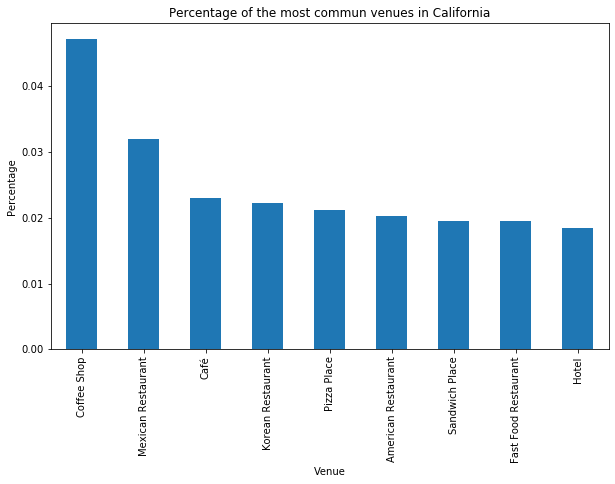

In [92]:
# step 2: plot data
import matplotlib.pyplot as plt
df6.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venue') # add to x-label to the plot
plt.ylabel('Percentage') # add y-label to the plot
plt.title('Percentage of the most commun venues in California') # add title to the plot

plt.show()


### TORONTO DATA

In [93]:
df5=Toronto_onehot.drop('Neighbourhood',1)#count all the rows and get the total sum
df5=df5.sum()
df5=df5.sort_values(ascending=False)
total_venues= df5.sum()


In [94]:
df6=df5[0:9]
df6

Coffee Shop           148
Café                   89
Restaurant             51
Italian Restaurant     47
Bakery                 40
Bar                    40
Hotel                  39
Park                   34
Pizza Place            33
dtype: int64

In [95]:
df6=df6/total_venues

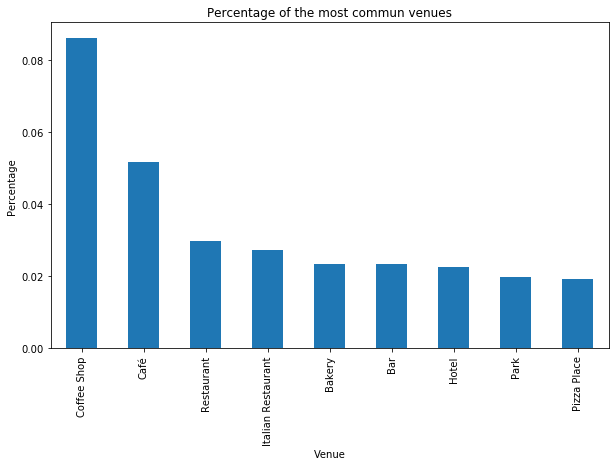

In [96]:
# step 2: plot data
import matplotlib.pyplot as plt
df6.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venue') # add to x-label to the plot
plt.ylabel('Percentage') # add y-label to the plot
plt.title('Percentage of the most commun venues') # add title to the plot

plt.show()


#### Manhattan

In [97]:
df5=manhattan_onehot.drop('Neighborhood',1)#count all the rows and get the total sum
df5=df5.sum()
df5=df5.sort_values(ascending=False)
total_venues= df5.sum()



In [98]:
df6=df5[0:9]
df6


Coffee Shop            126
Italian Restaurant     121
American Restaurant     79
Café                    79
Pizza Place             76
Bakery                  74
Park                    64
Gym                     60
Hotel                   60
dtype: int64

In [99]:
df6=df6/total_venues

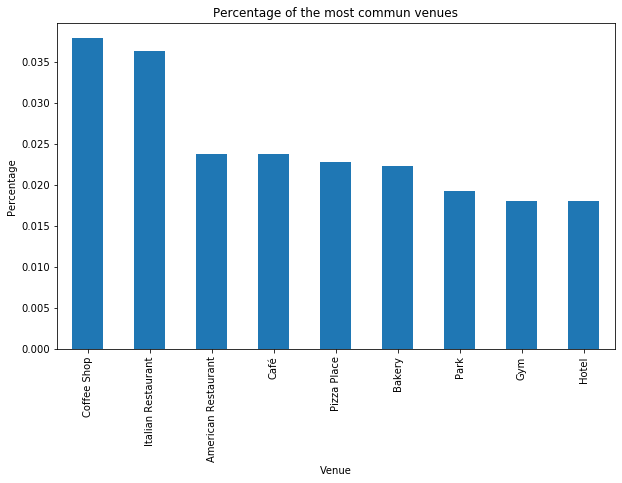

In [100]:
# step 2: plot data
import matplotlib.pyplot as plt
df6.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venue') # add to x-label to the plot
plt.ylabel('Percentage') # add y-label to the plot
plt.title('Percentage of the most commun venues') # add title to the plot

plt.show()


In my opinion all these cities are similar in a general sense. The most popular venue in all the locations are Café or Coffe Shops. Also, there is a great number of restaurants.
However, It is remarkable that in Toronto the number of Coffe Shops is by far superior in ratio than it is in the other cities. So if I had had to classify them I would focus on this attribute. In other words, Toronto is just a little bit different than California and New York because it has more Coffe Shops in ratio.


Also, Pizza places are in the 5th position in both California and Manhattan, compared to Toronto which has Pizza Places in the 10th position.

### NOW, LETS TRY TO PLOT JUST THE COFFE SHOPS

We need to consider Coffee Shops as Café

In [101]:
California_cafe= California_venues.loc[(California_venues['Venue Category']=='Coffee Shop')|(California_venues['Venue Category']=='Café')]

In [106]:
#now, lets try to plot!

latitude=34.0536909
longitude=-118.2427666
map_cafe_california= folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(California_cafe['Venue Latitude'],California_cafe['Venue Longitude'],California_cafe['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_cafe_california)
map_cafe_california

#### NOW TOROTNO

In [103]:
Toronto_cafe= Toronto_venues.loc[(Toronto_venues['Venue Category']=='Coffee Shop')|(Toronto_venues['Venue Category']=='Café')]


In [108]:
#now, lets try to plot!

latitude=43.653963
longitude=-79.387207
map_cafe_toronto= folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(Toronto_cafe['Venue Latitude'],Toronto_cafe['Venue Longitude'],Toronto_cafe['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_cafe_toronto)
map_cafe_toronto

#### Let's plot the coffee shops in NY

In [110]:
NY_cafe= manhattan_venues.loc[(manhattan_venues['Venue Category']=='Coffee Shop')|(manhattan_venues['Venue Category']=='Café')]


In [112]:
#now, lets try to plot!
#The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.

latitude=40.7896239
longitude= -73.9598939

map_cafe_ny= folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(NY_cafe['Venue Latitude'],NY_cafe['Venue Longitude'],NY_cafe['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_cafe_ny)
map_cafe_ny

### NOW, LETS TRY TO PLOT JUST THE PIZZA PLACES FROM TORONTO

Retrieving Pizza places from Toronto

In [113]:
Toronto_pizza= Toronto_venues.loc[(California_venues['Venue Category']=='Pizza Place')]

In [115]:
#now, lets try to plot the Pizza Places
latitude=43.653963
longitude=-79.387207
map_pizza_toronto= folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(Toronto_pizza['Venue Latitude'],Toronto_pizza['Venue Longitude'],Toronto_pizza['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_pizza_toronto)
map_pizza_toronto

#### Final words

We can conclude from the data and plots obtained some clear results. 

Toronto has the highest ratio by far of coffee shops compared to the other cities. So, using the graph that show us only the coffee shops, we can see that most of the coffee shops are in the city center. However, at its left, near the coast, there is almost none coffee shops and then a little bit farther they appear again, next to each other. So a good place to put a coffee shop would be for example near Spadina Fork York.

Also, an additional analysis about another popular venue was performed. We conclude that it might be a good idea to open a Pizza Place also in Toronto, because they are a little less popular there. The final plot show us that ,as in coffee shops, the most crowded place is Downtown Toronto. In addition to this, the same analysis can be made: a good idea would be to open a Pizza Place near the city center but where it is not croweded, Spadina Fork York, for example.


Thanks for the time you spent reading this notebook.